# Análise dos dados

Este notebook mostra a análise exploratória dos dados e o processo de seleção de features para a composição do modelo computacional a ser usado como suporte à triagem de pacientes com suspeita de tuberculose.

## Análise Exploratória dos Dados

In [2]:
# Manipulação dos dados
import numpy  as np
import scipy  as sp
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [3]:
# Carregando os dados
data = pd.read_excel('../Dados/Banco labels.xlsx')

In [4]:
# Visualização da tabela
data.head(5)

,TB_desfecho_final_Dri,Tbafranio,Obs_desfechoTB_Dri_Dani,Data_inclusão,Nome,Desfecho_tuberculose_lista_Mauro,Desfecho_TB_162_Revisão_ADRIANA,Observaça0_desfecho_TB,Resultado_BAAR_1,Resultado_BAAR_2,...,Perdeu_aula_hoje_CA,Deixou_de_ganhar_dinheiro_hoje_CA,Quanto_deixou_ganhar_CA,Caso_acompanhado_quem_custeou_tudo_CA,Valor_CA,Avaliador_custo_CA,Data_avaliação_custo_CA,Resultado_cultura_final < 3 & Realizou_RX = 1 (FILTER),ANO de inclusao,Novocriteriotbafranio
0,TB,SIM,NaN,2008-04-03,NaN,9,TB,TB PROBABILIDADE,Negativo,Negativo,...,IGN,IGN,Ignorado,IGN,ignorado,9,1999-09-09,Selected,2008,1
1,TB,SIM,NaN,2006-10-03,NaN,TB,TB,NaN,Negativo,Negativo,...,IGN,IGN,Ignorado,IGN,ignorado,9,1999-09-09,Selected,2006,1
2,TB,SIM,NaN,2007-06-21,NaN,TB,TB,TB CONFIRMADA,Negativo,Negativo,...,IGN,IGN,Ignorado,IGN,ignorado,9,1999-09-09,Selected,2007,1
3,TB,SIM,NaN,2009-09-30,NaN,TB,TB,NaN,Negativo,Negativo,...,IGN,IGN,Ignorado,IGN,ignorado,9,1999-09-09,Selected,2009,1
4,TB,SIM,NaN,2009-06-19,NaN,TB,NaN,NaN,Negativo,Negativo,...,Não,Não,"""Não se aplica""",não se aplica,não se aplica,Marcia dos Santos,2009-06-19,Not Selected,2009,1


In [5]:
# Tipos de dados presentes
data.dtypes.value_counts()

object            239
datetime64[ns]     19
int64              14
float64             9
dtype: int64

In [6]:
# Verificando os dados do tipo float64
print('Features do tipo float64: \n{}'.format(list(data.select_dtypes(include=['float64']).columns)))

# Verificando os dados do tipo int64
print('\nFeatures do tipo int64: \n{}'.format(list(data.select_dtypes(include=['int64']).columns)))

# Verificando os dados do tipo object
print('\nFeatures do tipo object: \n{}'.format(list(data.select_dtypes(include=['object']).columns)))

Features do tipo float64: 
['Nome', 'Prontuário_PAAP', 'Número_cultura', 'Número_cultura_segunda_amostra', 'N°_TB', 'Peso_habitual', 'Peso_atual', 'Altura_cm', 'Valor_comida_bebida_CA']

Features do tipo int64: 
['Probabilidade_TBP_sem_RX_ou_BAAR', 'Probabilidade_TBP_com_RX_e_BAAR', 'Número_geral', 'Idade', 'Telefone_1', 'Telefone_2', 'CEP', 'Valor_pts_escore', 'Descrever_outros_fármacos', 'Valor_pernoite_CA', 'Valor_algo_CA', 'Valor_algo_posto_CA', 'ANO  de inclusao', 'Novocriteriotbafranio']

Features do tipo object: 
['TB_desfecho_final_Dri', 'Tbafranio', 'Obs_desfechoTB_Dri_Dani', 'Desfecho_tuberculose_lista_Mauro', 'Desfecho_TB_162_Revisão_ADRIANA', 'Observaça0_desfecho_TB', 'Resultado_BAAR_1', 'Resultado_BAAR_2', 'Resultado_Cultutra_1', 'Resultado_Cultura_2', 'identificado_tb_ntb', 'Houve_desfecho_consulta_médica__inicial', 'Compareceram_consulta_medica', 'TTO_TB_confirmação_bacteriológica', 'TTO_TB_probabilidade', 'Transferência_internação_não_TB_outra_especialidade', 'TTO_pneum

### Visualização gráfica dos dados

Visualização de dados básicos sobre os pacientes participantes do estudo.

In [7]:
data['TB_desfecho_final_Dri'].unique()

array(['TB', 'Não TB', 'IGN', 8], dtype=object)

In [8]:
# Primeiramente, filtrando somente os labels corretos
data = data[(data['TB_desfecho_final_Dri'] == 'TB') | (data['TB_desfecho_final_Dri'] == 'Não TB')]

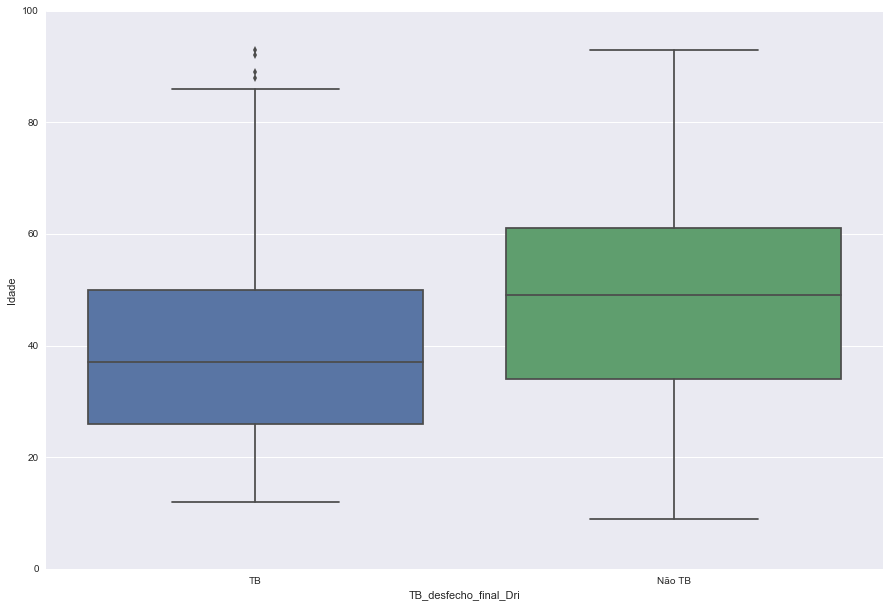

In [21]:
# Visualização de sexo e idade dos participantes
sns.set()
plt.figure(figsize=(15,10))
sns.boxplot(data=data[data.Idade < 100],y='Idade',x='TB_desfecho_final_Dri',orient='v')
plt.show()

In [24]:
data.Sexo.unique()

array(['Masculino', 'Feminino', 2, 'IGN'], dtype=object)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

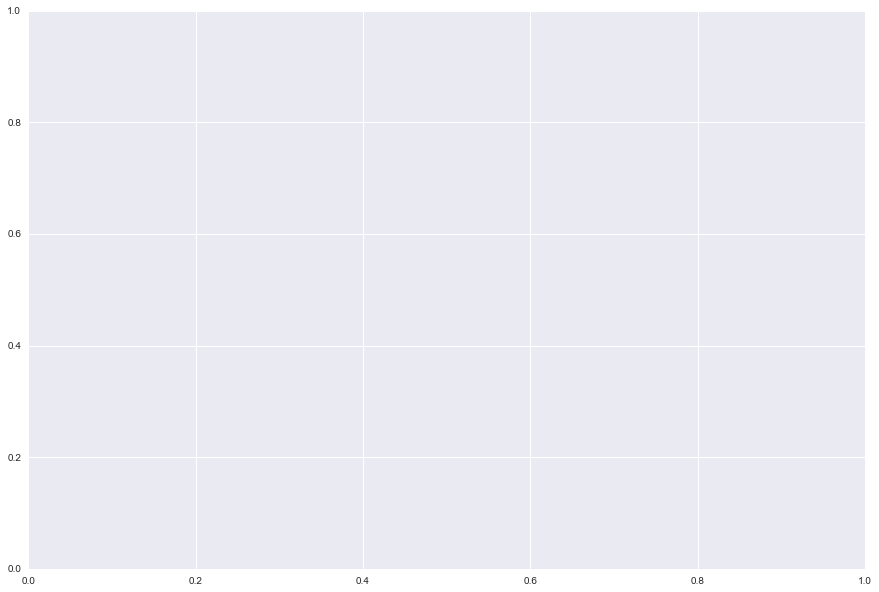

In [29]:
# Visualização de sexo e idade dos participantes
sns.set()
plt.figure(figsize=(15,10))
sns.boxplot(data=data,y='Perda_peso_10percent',hue='TB_desfecho_final_Dri',orient='h')
plt.show()